# Introdução aos Métodos Discretos

Nome: Yago Pereira dos Anjos Santos

1) Construa uma equação de Poisson que tenha a seguinte solução fabricada:
\begin{equation*}
    u(x) = sen(x),
\end{equation*}
para $x\in [0,1]$

a) Utilizando h=0.1 resolva a equação diferencial construída. Plote a solução aproximada e a analítica

b) Mostre que o MDF utilizado é $O(h^2)$. Tomando $h\in[10^{-4}, 10^{-1}]$, plote, em escala log-log, o gráfico de $h$ versus erro e calcule a inclinação destas retas. **Execute esta analise para as normas 1, 2 e infinito.**

Resolução (a): Calculando a derivada segunda de $u(x)$ temos $\dfrac{d^{2}u(x)}{dx^{2}} = -\sin(x)$, $x \in [0, 1]$. Desta forma, temos o seguinte problema de valor de contorno de Dirichlet:
\begin{cases}
    \dfrac{d^{2}u(x)}{dx^{2}} = -\sin(x) &\text{ para } x \in (0, 1), \\
    u(0) = 0, \\
    u(1) = \sin(1).
\end{cases}
Para $h = 0.1$ temos $N = \dfrac{b - a}{h} = \dfrac{1 - 0}{0.1} = 10$ subintervalos, totalizando $N+1 = 11$ pontos $x_{i}$ no domínio discretizado, onde $i = 0, \ldots, 10$, $x_{0} = 0$ e $x_{10} = 1$. Como $u_{0} = u(0) = 0$ e $u_{10} = u(1) = \sin(1)$, temos um total de $n = 9$ incógnitas para o problema, $u_{i} = u(x_{i})$ com $i = 1, \ldots, 9$. Aplicando o Método das Diferenças Finitas, $u''(x_{i}) = \dfrac{u(x_{i-1}) -2\,u(x_{i}) + u(x_{i+1})}{h^{2}}$, para $i = 1, \ldots, 9$, temos:
\begin{align*}
    &\frac{-2\,u_{1} + u_{2}}{h^{2}} = -\sin(x_{1}), \frac{u_{1} -2\,u_{2} + u_{3}}{h^{2}} = -\sin(x_{2}),
    \frac{u_{2} -2\,u_{3} + u_{4}}{h^{2}} = -\sin(x_{3}) \\
    &\frac{u_{3} -2\,u_{4} + u_{5}}{h^{2}} = -\sin(x_{4}), \frac{u_{4} -2\,u_{5} + u_{6}}{h^{2}} = -\sin(x_{5}),
    \frac{u_{5} -2\,u_{6} + u_{7}}{h^{2}} = -\sin(x_{6}) \\
    &\frac{u_{6} -2\,u_{7} + u_{8}}{h^{2}} = -\sin(x_{7}), \frac{u_{7} -2\,u_{8} + u_{9}}{h^{2}} = -\sin(x_{8}),
    \frac{u_{8} -2\,u_{9} + \sin(1)}{h^{2}} = -\sin(x_{9}).
\end{align*}
Desta forma, obtemos o seguinte sistema linear:

$A\,u = f \Rightarrow \begin{pmatrix}
    -2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & -2 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 & 1 & -2 & 1 & 0 \\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & -2 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & -2 \\
\end{pmatrix}\,
\begin{pmatrix}
    u_1 \\ u_2 \\ u_3 \\ u_4 \\ u_5 \\ u_6 \\ u_7 \\ u_8 \\ u_9
\end{pmatrix} =
\begin{pmatrix}
    -h^{2}\,\sin(x_1) \\ -h^{2}\,\sin(x_2) \\ -h^{2}\,\sin(x_3) \\ -h^{2}\,\sin(x_4) \\
    -h^{2}\,\sin(x_5) \\ -h^{2}\,\sin(x_6) \\ -h^{2}\,\sin(x_7) \\ -h^{2}\,\sin(x_8) \\ -h^{2}\,\sin(x_{9}) - \sin(1)
\end{pmatrix}$.

Resolução (b): Plotando em escala log-log o gráfico de h $\in [10^{-4}, 10^{-1}]$ versus erro para as diferentes normas, foram obtidos os seguintes valores para as inclinações (com quatro casas decimais):

| **Norma** | **Soma (1)** | **Euclidiana (2)** | **Inf (np.inf)** |
|-------------|-------------|-------------|-------------|
| Inclinação     | 1.9837     | 1.9847     | 1.9823     |

Logo, para cada uma das normas utilizadas obteve-se um valor de aproximadamente $2$ para a inclinação da reta, de modo que o MDF utilizado é $O(h^{2})$.

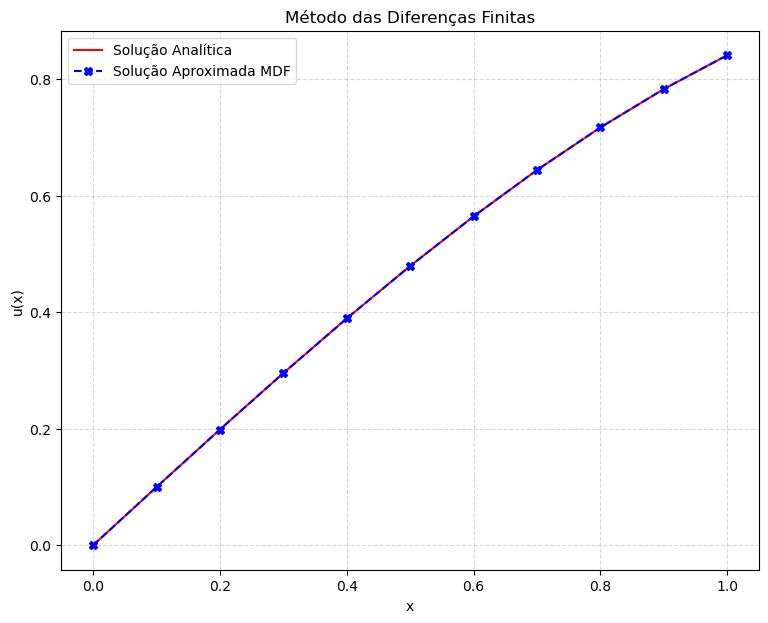

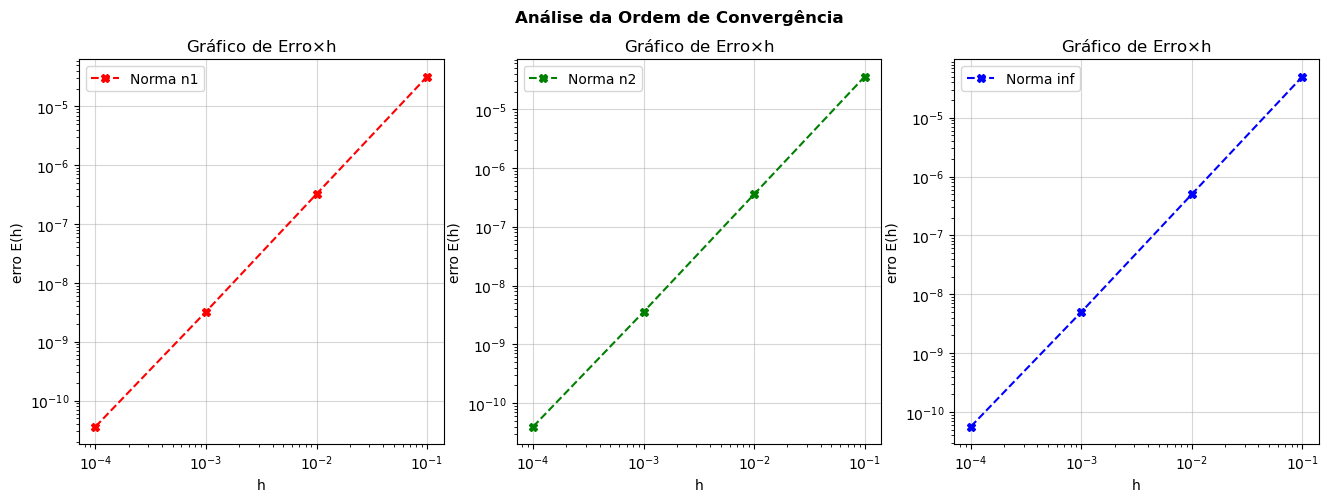

Inclinação da reta na norma n1: 1.9836753784635555.
Inclinação da reta na norma n2: 1.9846977123144613.
Inclinação da reta na norma inf: 1.9822639929017092.
Logo, o MDF é O(h^{2})


In [1]:
import numpy as np
import matplotlib.pyplot as plt


''' Construindo a matriz A do sistema linear obtido apartir de diferenças finitas '''

def Matriz(tam):
    A = np.zeros((tam, tam))
    A[0, 1], A[tam-1, tam-2] = 1, 1
    for i in range(tam):
        A[i, i] = -2
        if 0 < i < tam-1:
            A[i, i-1], A[i, i+1] = 1, 1
    return A


''' Construindo o vetor f para a solução do sistema linear Au = f '''


def F(x, tam, h):
    f = np.zeros(tam)
    for i in range(tam-1):
        f[i] = -h**2*np.sin(x[i+1])
    f[-1] = -h**2*np.sin(x[tam]) - np.sin(1)
    return f


# Definindo o passo h e discretizando o domínio
h = 0.1
x = np.arange(0, 1+h, h)
# tam = int(((1 - 0)/h) - 1)
tam = len(x) - 2

A = Matriz(tam)
f = F(x, tam, h)
# Resolvendo o sistema linear Au = f
sol = np.linalg.solve(A, f)
# Solução completa com os valores no contorno
u = np.array([0, *sol, np.sin(1)])

''' Plotando as soluções '''
plt.figure(figsize=(9, 7))

# Plotando o gráfico da solução aproximada pelo Método das Diferenças Finitas
plt.plot(x, np.sin(x), color='red', label='Solução Analítica')
plt.plot(x, u, color='blue', label='Solução Aproximada MDF', marker='X', ls='--')
plt.title('Método das Diferenças Finitas')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(alpha=0.5, ls='--')
plt.show()

h = np.logspace(-4, -1, 4)
erro_n1 = np.zeros(len(h))
erro_n2 = np.zeros(len(h))
erro_inf = np.zeros(len(h))

for i, k in enumerate(h):
    x = np.arange(0, 1+k, k)
    tam = len(x) - 2
    A = Matriz(tam)
    f = F(x, tam, k)
    sol = np.array([0, *np.linalg.solve(A, f), np.sin(1)])
    aux = sol - np.sin(x)
    erro_n1[i] = np.linalg.norm(aux, 1)*k
    erro_n2[i] = np.linalg.norm(aux, 2)*k**0.5
    erro_inf[i] = np.linalg.norm(aux, np.inf)

inclinacao_n1 = (np.log10(erro_n1[-1]) - np.log10(erro_n1[0]))/(np.log10(h[-1]) - np.log10(h[0]))
inclinacao_n2 = (np.log10(erro_n2[-1]) - np.log10(erro_n2[0]))/(np.log10(h[-1]) - np.log10(h[0]))
inclinacao_inf = (np.log10(erro_inf[-1]) - np.log10(erro_inf[0]))/(np.log10(h[-1]) - np.log10(h[0]))

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.loglog(h, erro_n1, color='red', ls='--', marker='X', label='Norma n1')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(h, erro_n2, color='green', ls='--', marker='X', label='Norma n2')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 3, 3)
plt.loglog(h, erro_inf, color='blue', ls='--', marker='X', label='Norma inf')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.suptitle('Análise da Ordem de Convergência', fontweight='bold')
plt.show()

print(f'Inclinação da reta na norma n1: {inclinacao_n1}.')
print(f'Inclinação da reta na norma n2: {inclinacao_n2}.')
print(f'Inclinação da reta na norma inf: {inclinacao_inf}.')
print('Logo, o MDF é O(h^{2})')

2) Resolva pelo MDF a seguinte equação
\begin{equation*}
\begin{cases}
    \frac{d^2 u}{dx^2} = cos(x) & \text{ para } x\in (0,1)\\
    u'(x) = 1 &\text{ para } x=0\\
    u(x) =  1&\text{ para } x=1\\
\end{cases}
\end{equation*}
Sabendo que a solução exata desta equação é:
\begin{equation*}
u(x) = -cos(x) + x + cos(1)
\end{equation*}


a)  Utilizando a diferença progressiva na condição de contorno, mostre que o MDF utilizado é $O(h)$. Tomando $h\in[10^{-4}, 10^{-1}]$, plote, em escala log-log, o gráfico de $h$ versus erro e calcule a inclinação da reta. **Execute utilizando uma das normas (1, 2 ou inf)**

b) Utilizando a diferença centrada na condição de contorno, mostre que o MDF utilizado é $O(h^2)$. Tomando $h\in[10^{-4}, 10^{-1}]$, plote, em escala log-log, o gráfico de $h$ versus erro e calcule a inclinação da reta. **Execute utilizando uma  das normas (1, 2 ou inf)**

Resolução (a): Pela implementação do algoritmo a seguir, observamos que, utilizando Diferença Progressiva no contorno, as inclinações das retas (com quatro casas decimais) obtidas ao se plotar em escala log-log o gráfico de h versus erro são:

| **Norma** | **Soma (1)** | **Euclidiana (2)** | **Inf (np.inf)** |
|-------------|-------------|-------------|-------------|
| Inclinação     | 1.0123     | 1.0091     | 0.9989     |

Logo, para cada uma das normas utilizadas foi obtido um valor para a inclinação de aproximadamente $1$ mostrando que o MDF utilizado é $O(h)$.

Resolução (b): Para o caso da utilização de diferença centrada no contorno, foram obtidos os seguinte valores para as inclinações das retas (com quatro casas decimais):

| **Norma** | **Soma (1)** | **Euclidiana (2)** | **Inf (np.inf)** |
|-------------|-------------|-------------|-------------|
| Inclinação     | 2.0116     | 2.0081     | 2.0020     |

Portanto, para cada uma das normas utilizadas obteve-se um valor para a inclinação de aproximadamente $2$, de modo que o MDF utilizado é $O(h^{2})$

Gráficos das soluções


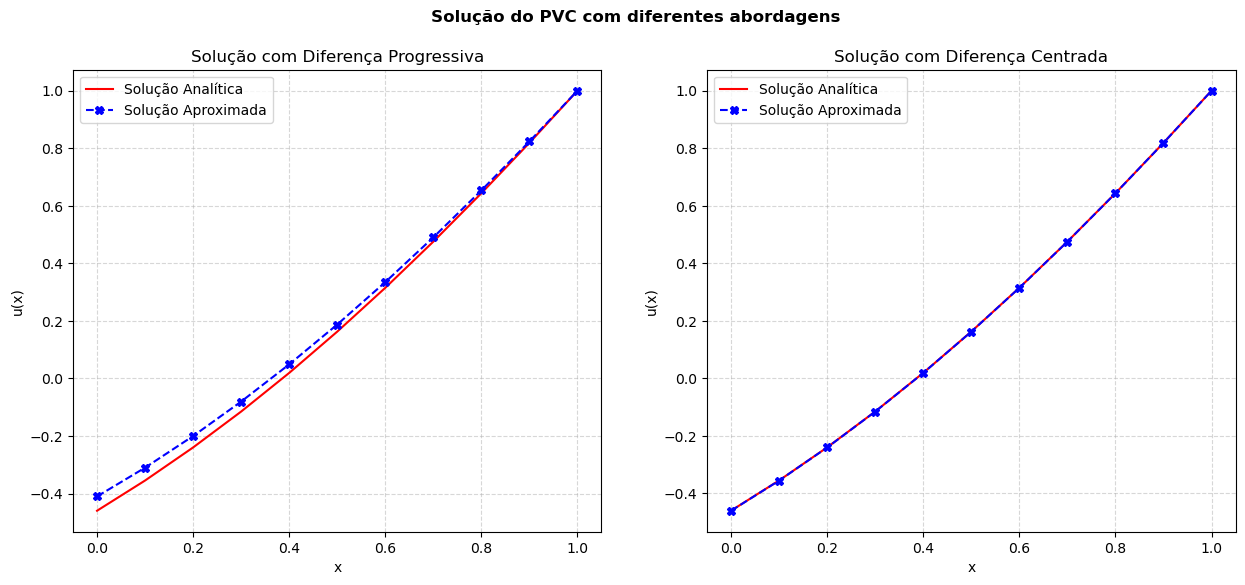

Ordem de convergência para Diferença Progressiva


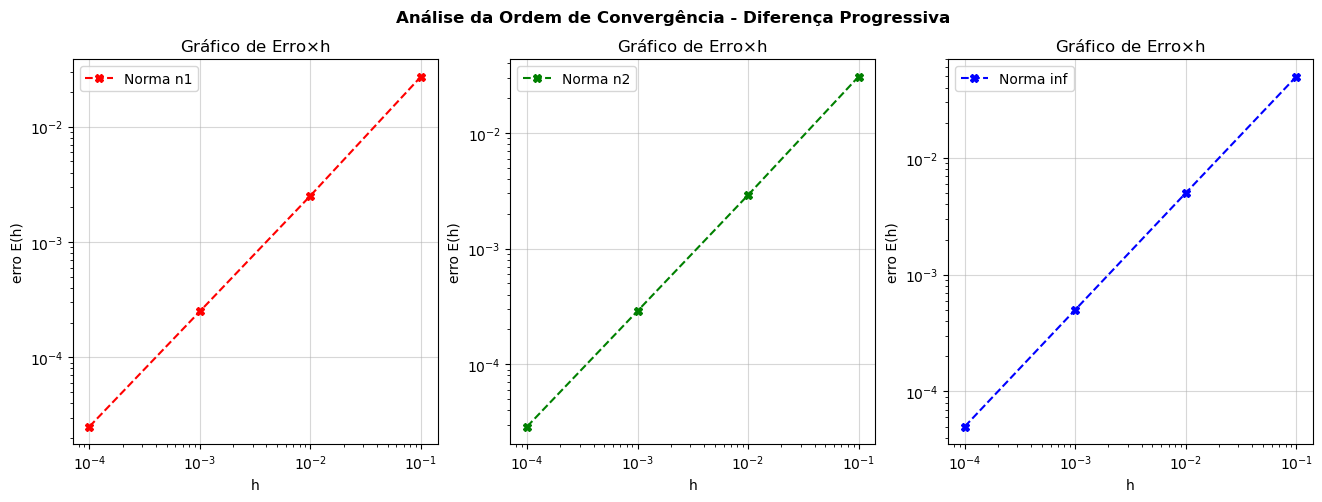

Inclinação da reta na norma n1: 1.0123578877023742.
Inclinação da reta na norma n2: 1.009079809978208.
Inclinação da reta na norma inf: 0.9988871308501949.
Logo, o MDF é O(h)

Ordem de Convergência para Diferença Centrada


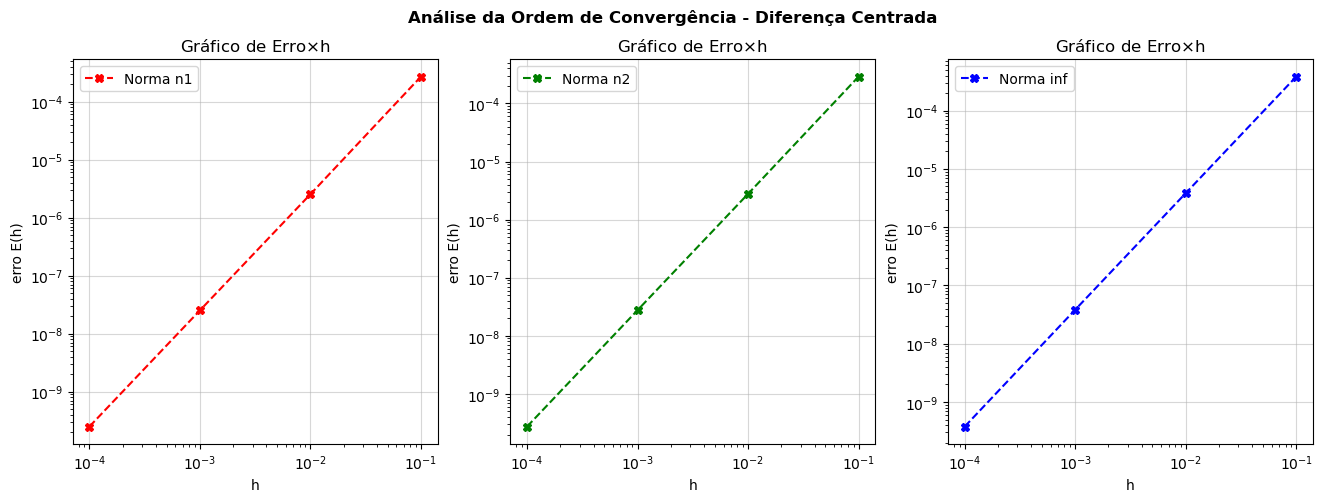

Inclinação da reta na norma n1: 2.011565884988632.
Inclinação da reta na norma n2: 2.0080739255589752.
Inclinação da reta na norma inf: 2.0020189150381227.
Logo, o MDF é O(h^{2})


In [2]:
''' Solução com Diferença progressiva na fronteira '''


# Construção da matriz A
def matriz_neumann(tam, h):
    A = np.zeros((tam, tam))
    A[0, 0], A[0, 1] = -h, h
    for i in range(1, tam-1):
        A[i, i-1], A[i, i], A[i, i+1] = 1, -2, 1
    A[tam-1, tam-1] = h**2
    return A


# Construção do vetor f para diferença progressiva na fronteira
def f_prog(tam, x,  h):
    f = np.zeros(tam)
    f[0] = h**2
    for i in range(1, tam-1):
        f[i] = h**2*np.cos(x[i])
    f[tam-1] = h**2
    return f


''' Usando diferença centrada na fronteira com ponto fantasma '''


# Construção do vetor f para diferença centrada na fronteira
def f_cent(tam, x, h):
    f = np.zeros(tam)
    f[0] = h**2*(1 + (h/2)*np.cos(x[0]))
    for i in range(1, tam-1):
        f[i] = h**2*np.cos(x[i])
    f[tam-1] = h**2
    return f


# Solução analítica
def W(x):
    return -np.cos(x) + x + np.cos(1)


h = 0.1
x = np.arange(0, 1+h/2, h)
tam = len(x)

A = matriz_neumann(tam, h)
f1 = f_prog(tam, x, h)
f2 = f_cent(tam, x, h)

u1 = np.linalg.solve(A, f1)
u2 = np.linalg.solve(A, f2)
w = W(x)

print('Gráficos das soluções')
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(x, w, color='red', label='Solução Analítica')
plt.plot(x, u1, color='blue', ls='--', marker='X', label='Solução Aproximada')
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solução com Diferença Progressiva')

plt.subplot(1, 2, 2)
plt.plot(x, w, color='red', label='Solução Analítica')
plt.plot(x, u2, color='blue', ls='--', marker='X', label='Solução Aproximada')
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solução com Diferença Centrada')

plt.suptitle('Solução do PVC com diferentes abordagens', fontweight='bold')
plt.show()

''' Análise da ordem de convergência para diferença progressiva '''
h = np.logspace(-4, -1, 4)
erro_n1 = np.zeros(len(h))
erro_n2 = np.zeros(len(h))
erro_inf = np.zeros(len(h))

for i, k in enumerate(h):
    x = np.arange(0, 1+k/2, k)
    tam = int(((1 - 0)/k) + 1)
    A = matriz_neumann(tam, k)
    f = f_prog(tam, x, k)
    u = np.linalg.solve(A, f)
    diferenca = u - W(x)
    erro_n1[i] = np.linalg.norm(diferenca, 1)*k
    erro_n2[i] = np.linalg.norm(diferenca, 2)*k**0.5
    erro_inf[i] = np.linalg.norm(diferenca, np.inf)

inclinacao_n1 = (np.log10(erro_n1[-1]) - np.log10(erro_n1[0]))/(np.log10(h[-1]) - np.log10(h[0]))
inclinacao_n2 = (np.log10(erro_n2[-1]) - np.log10(erro_n2[0]))/(np.log10(h[-1]) - np.log10(h[0]))
inclinacao_inf = (np.log10(erro_inf[-1]) - np.log10(erro_inf[0]))/(np.log10(h[-1]) - np.log10(h[0]))

print('Ordem de convergência para Diferença Progressiva')
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.loglog(h, erro_n1, color='red', ls='--', marker='X', label='Norma n1')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(h, erro_n2, color='green', ls='--', marker='X', label='Norma n2')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 3, 3)
plt.loglog(h, erro_inf, color='blue', ls='--', marker='X', label='Norma inf')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.suptitle('Análise da Ordem de Convergência - Diferença Progressiva', fontweight='bold')
plt.show()

print(f'Inclinação da reta na norma n1: {inclinacao_n1}.')
print(f'Inclinação da reta na norma n2: {inclinacao_n2}.')
print(f'Inclinação da reta na norma inf: {inclinacao_inf}.')
print('Logo, o MDF é O(h)')

''' Análise da ordem de convergência para diferença centrada '''
h = np.logspace(-4, -1, 4)
erro_n1 = np.zeros(len(h))
erro_n2 = np.zeros(len(h))
erro_inf = np.zeros(len(h))

for i, k in enumerate(h):
    x = np.arange(0, 1+k/2, k)
    tam = int(((1 - 0)/k) + 1)
    A = matriz_neumann(tam, k)
    f = f_cent(tam, x, k)
    u = np.linalg.solve(A, f)
    diferenca = u - W(x)
    erro_n1[i] = np.linalg.norm(diferenca, 1)*k
    erro_n2[i] = np.linalg.norm(diferenca, 2)*k**0.5
    erro_inf[i] = np.linalg.norm(diferenca, np.inf)

inclinacao_n1 = (np.log10(erro_n1[-1]) - np.log10(erro_n1[0]))/(np.log10(h[-1]) - np.log10(h[0]))
inclinacao_n2 = (np.log10(erro_n2[-1]) - np.log10(erro_n2[0]))/(np.log10(h[-1]) - np.log10(h[0]))
inclinacao_inf = (np.log10(erro_inf[-1]) - np.log10(erro_inf[0]))/(np.log10(h[-1]) - np.log10(h[0]))

print('\nOrdem de Convergência para Diferença Centrada')
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.loglog(h, erro_n1, color='red', ls='--', marker='X', label='Norma n1')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(h, erro_n2, color='green', ls='--', marker='X', label='Norma n2')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.subplot(1, 3, 3)
plt.loglog(h, erro_inf, color='blue', ls='--', marker='X', label='Norma inf')
plt.grid(alpha=0.5)
plt.title('Gráfico de Erro$\\times$h')
plt.ylabel('erro E(h)')
plt.xlabel('h')
plt.legend()

plt.suptitle('Análise da Ordem de Convergência - Diferença Centrada', fontweight='bold')
plt.show()

print(f'Inclinação da reta na norma n1: {inclinacao_n1}.')
print(f'Inclinação da reta na norma n2: {inclinacao_n2}.')
print(f'Inclinação da reta na norma inf: {inclinacao_inf}.')
print('Logo, o MDF é O(h^{2})')